<a href="https://colab.research.google.com/github/aditya8075/Bike-Sharing-Demand-Prediction---Supervised-machine-Learning-Regression/blob/main/Bike_Sharing_Demand_Prediction_Supervised_machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Seoul Bike Sharing Demand Prediction

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [787]:
#importing pakages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import datetime as dt
import datetime as datetime

### Loading Data

In [673]:
#mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [674]:
#reading_our_dataset
bike_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding = 'unicode_escape')

In [675]:
#head of dataset
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [676]:
#tail of dataset
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [677]:
# finding how many records and features present in dataset
bike_df.shape

(8760, 14)

In [678]:
#number of fetures and lebels exist in our dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [679]:
# Describe method is used for calculating some statistical data like Mean, percentile,standard of numerical value. It analyse both numeric and object series and also dataframe column set of mixed data type.
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [680]:
# Info method usual gives imformation of Dataframes.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [681]:
# finding how many null value are present in each column
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Conclusison - There are no null values preset in Dataset

In [682]:
# Finding how many duplicate rows in our dataset
bike_df.duplicated().sum()

0

Conclusion - There are No duplicates present in Dataset

 In above, we come to know that No any duplicate and missing value

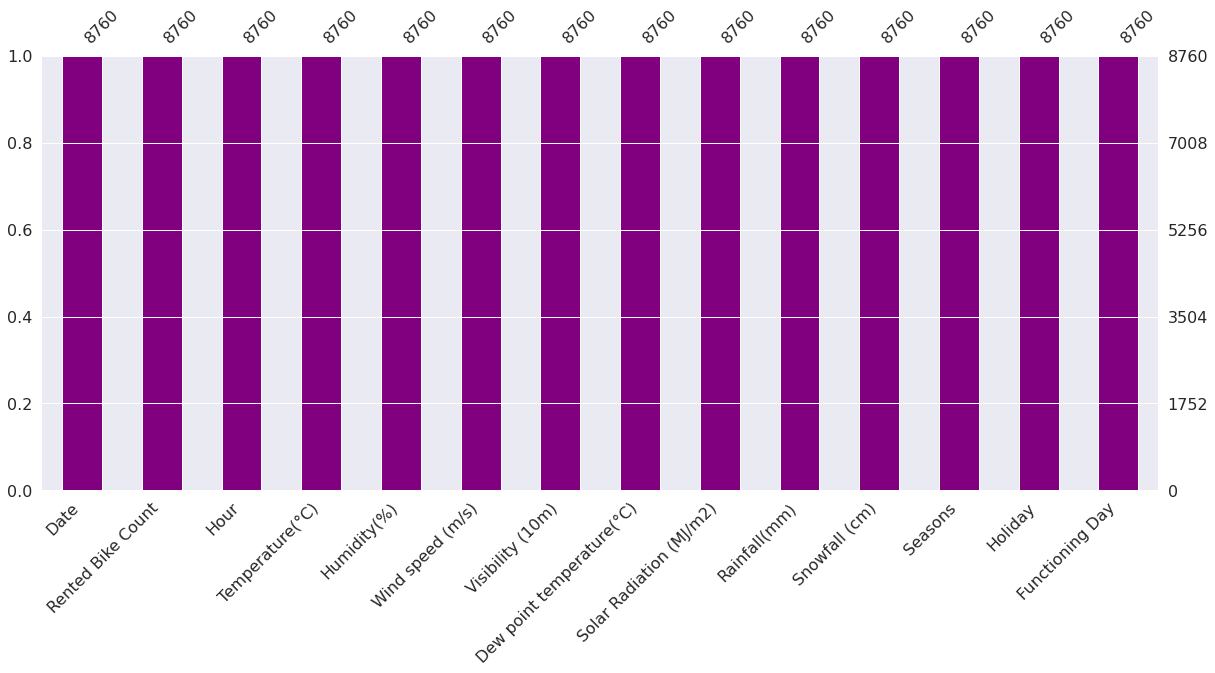

In [683]:
# Visualize missing data
import missingno as mn
mn.bar(bike_df, figsize=(20,8), color='purple')

# Feature Engineering

In [684]:
# Type of date
bike_df['Date'].dtype

dtype('O')

In [685]:
# Converting string formate of "Date" into date-time format
bike_df['Date'] = pd.to_datetime(bike_df['Date'],format='%d/%m/%Y')
bike_df['Date'].dtype

dtype('<M8[ns]')

In [686]:
bike_df['year'] = pd.DatetimeIndex(bike_df['Date']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['Date']).month
bike_df['Dayofweek'] = bike_df['Date'].dt.weekday

In [687]:
# Replace month number in words for understanding
bike_df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],inplace=True)

In [688]:
#Replace dayofweek into Numbers
bike_df['Dayofweek'].replace([0,1,2,3,4,5,6],['Mon','Tues','Wed','Thur','Fri','Sat','Sun'],inplace=True)

#. EDA On Dataset
EDA is uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not easily Readble

In [689]:
#how many seasons exists in our dataset
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


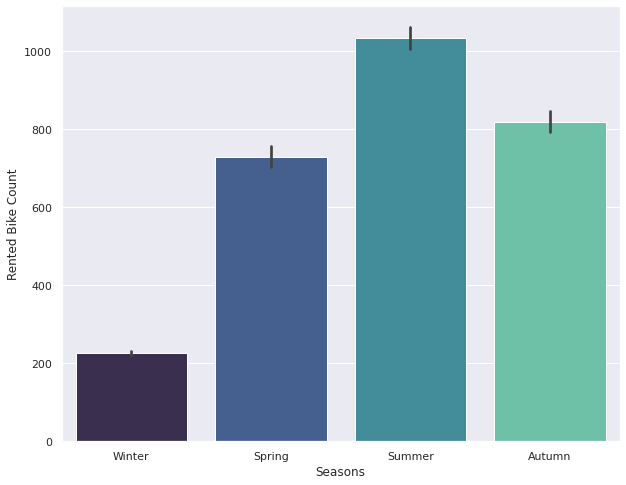

In [690]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.barplot(bike_df['Seasons'], bike_df['Rented Bike Count'], palette='mako')

conclusison 

   1. In summer season most of the bikes have been rented.
   2. In winter seson minimum bikes have been rented as compared to other seasons.
   3. In Spring and Autumn Seasons approx equal Number of bikes rented which is less than
      summer season and greater then winter season.

# Data Visualization

Text(0.5, 1.0, 'Count of Rented bikes acording to seasons')

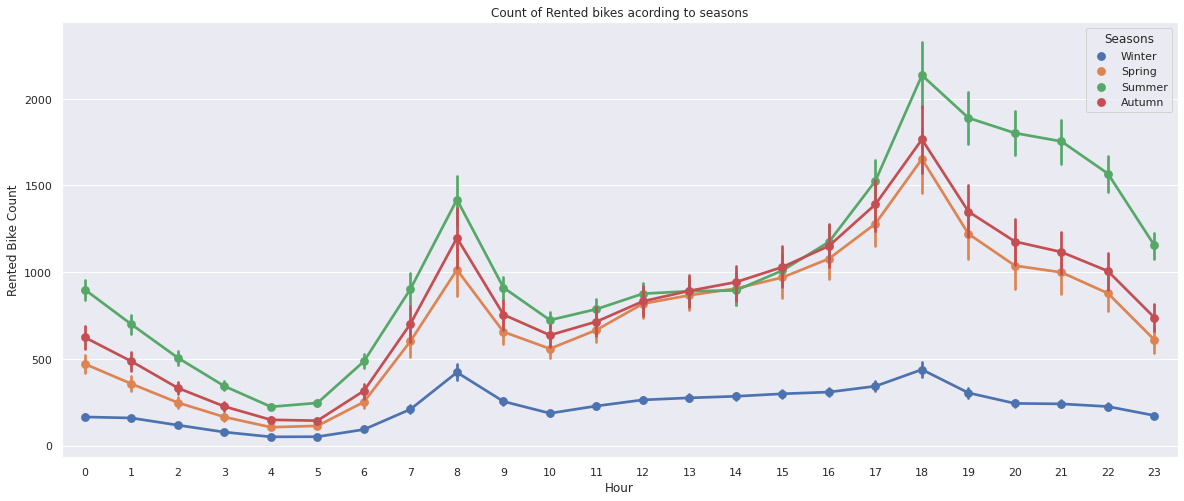

In [691]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='Hour', y='Rented Bike Count', data=bike_df, hue='Seasons', ax=ax)
ax.set_title('Count of Rented bikes acording to seasons')

Conclusion
  1. Above line plot shows the bikes are rented season wise w.r.t. Hour
  2. there is a high pick in between 6 am to 8 am and 5 pm to 8 pm in the number of rented
      bike counts in all seasons .
  3. Summer season having high number of rented bike counts . autumn has comparitively low 
     rented bike counts after that spring seasons have second last in rented bike counts
     and winter season in which the less number of bikes are rented as compared to other
     seasons.

In [692]:
bike_df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

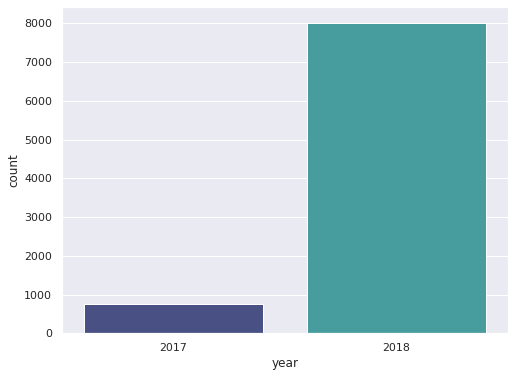

In [693]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'year', data = bike_df,palette='mako')

conclusion 
  1. In year 2018 most number of bikes have been rented.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


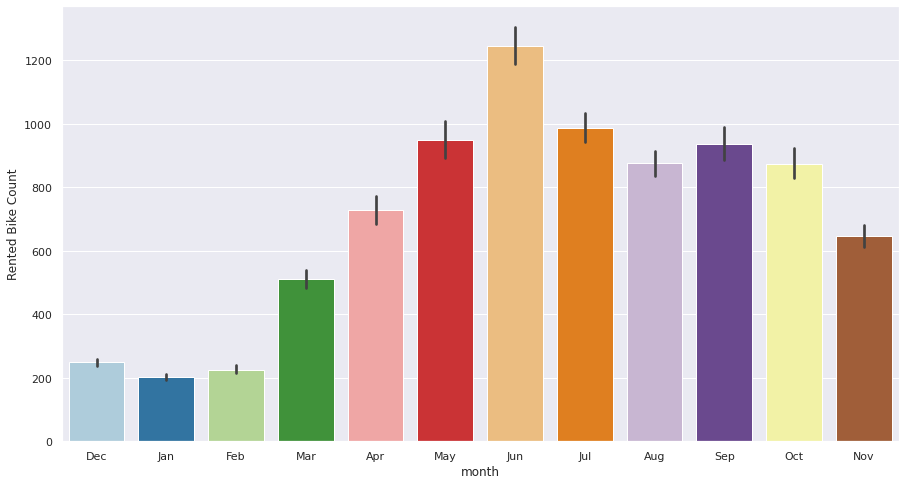

In [694]:
plt.figure(figsize=(15,8))
sns.barplot('month', 'Rented Bike Count', data=bike_df, palette='Paired')

Conclusion
   1.We can see that in the following barplot mostof the bikes are rented in june which is 
     in summer season.
   2.After that the nmber of rented bike counts has been decreassing in Rainy season.
   3.Minimum number of rented bike are in Jan which is exist in Winter season

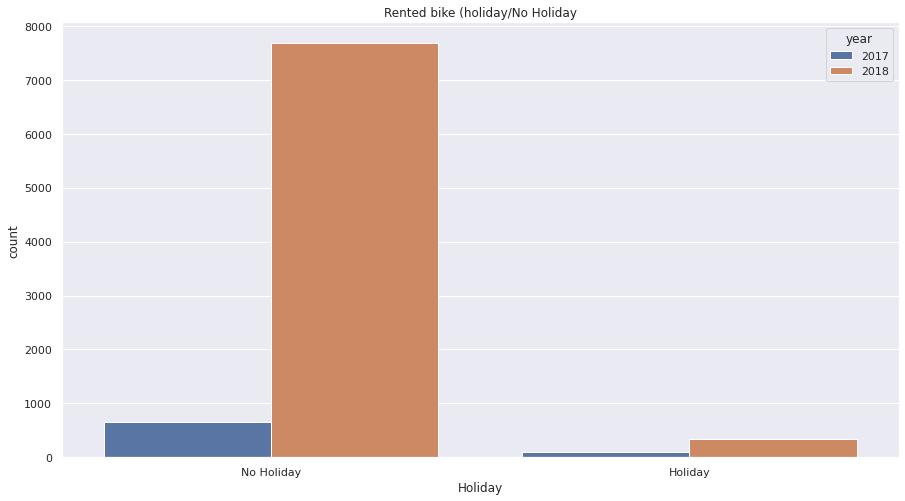

In [695]:
# rented bike on holidays
plt.figure(figsize=(15,8))
sns.countplot(x='Holiday', hue='year', data= bike_df)
plt.title('Rented bike (holiday/No Holiday')
plt.show()

Conclusion
   1. On No Holiday we have most number of rented bike count So we can say that working 
      peoples rent bikes on working day mostly.
   2. On Holiday we have minimum Rented bikes count so we can say that peoples are not 
      prefering bike rental sevices much on no haliday.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


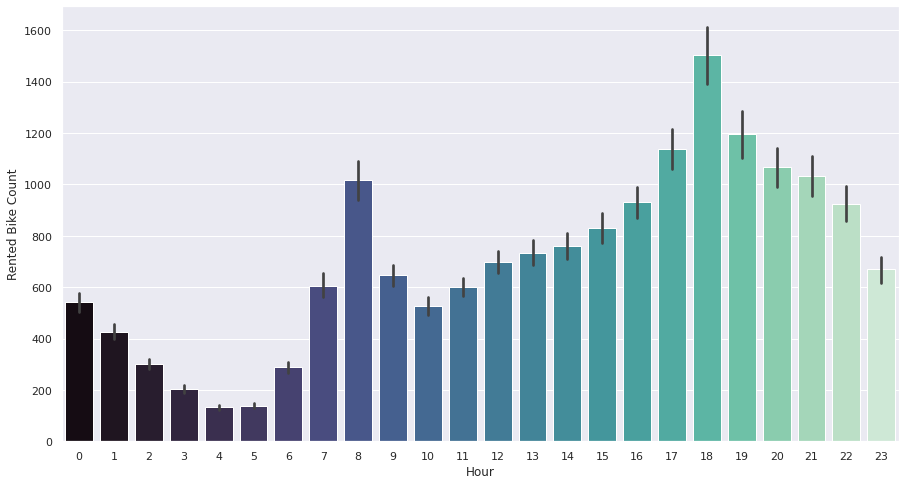

In [696]:
plt.figure(figsize=(15,8))
sns.barplot('Hour','Rented Bike Count', data=bike_df, palette='mako')

Conclusion
  1. On the following bar plot we can observe that from 5 pm to 7 pm most number of bikes 
     have been rented.
  
  2. And the minimum bikes are rented in morning from 3 am to 5 am.

Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')

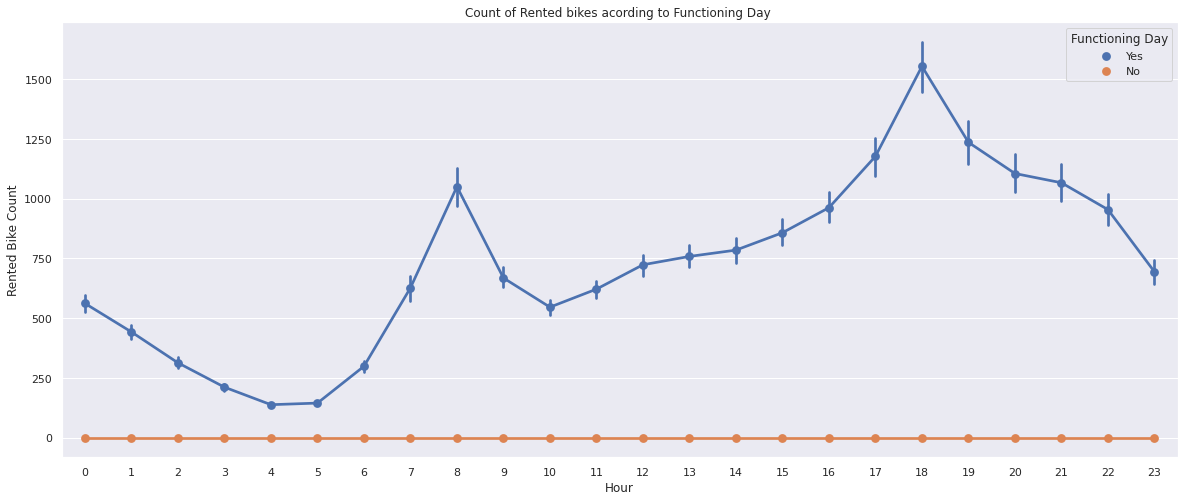

In [697]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='Hour', y='Rented Bike Count', data=bike_df, hue='Functioning Day', ax=ax)
ax.set_title('Count of Rented bikes acording to Functioning Day ')

Conclusion
 1. In the following line plot we cn see that,Maximum baike are rented on the Functioning 
    day and the pick in rented bike counts is maximum from 6 am to 8 am and from 4 pm to 8 
    pm.
2.  No bikes are rented on the non function day as shown from our data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


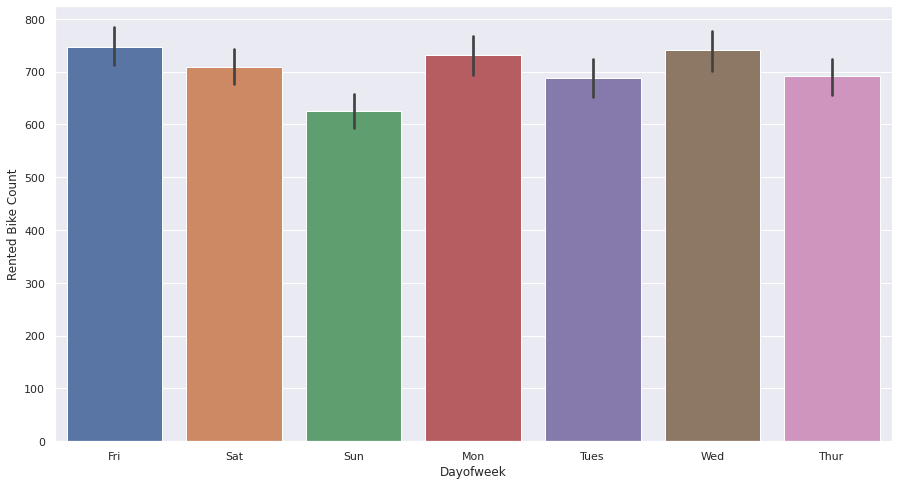

In [698]:
plt.figure(figsize=(15,8))
sns.barplot('Dayofweek','Rented Bike Count', data = bike_df)

Conclusion = 1. On weekend day minimum number of bike are rented.
             2. On week days or working days maximum number of bike are rented.

Text(0.5, 1.0, 'Count of Rented bikes acording to holiday ')

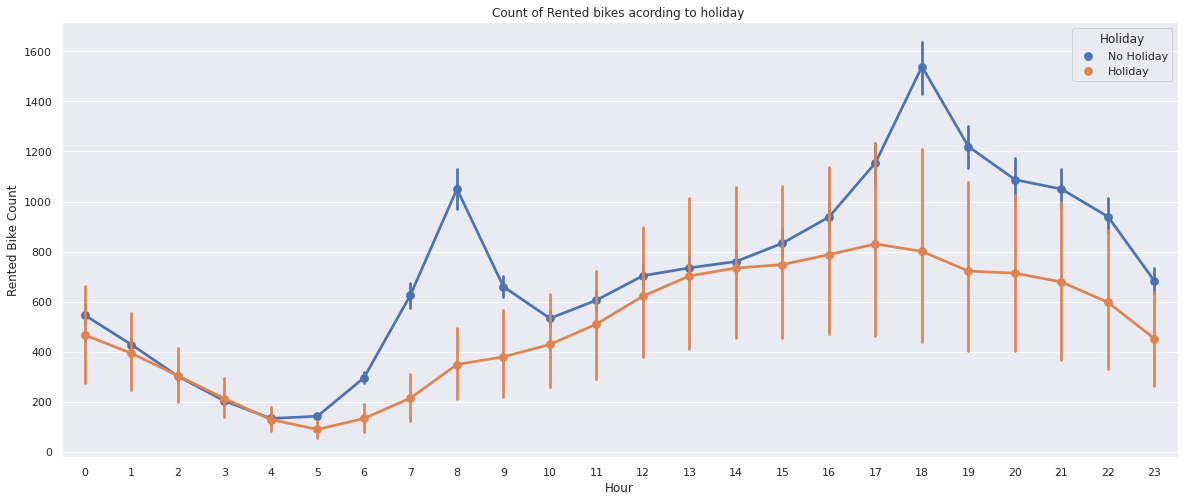

In [699]:
# Count of rented bike according to holidays
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='Hour', y='Rented Bike Count', data=bike_df, hue='Holiday', ax=ax)
ax.set_title('Count of Rented bikes acording to holiday ')

Conclusion
   1. We seen that during holiday time rented bike quite less as compare to working days 
      or no holiday.
   2. from No holiday line graph we can see that most of the bikes have been rented from 5 
      am to 9 am after that no of bikes rented becomes low then we can observe that there 
      pick from 4 pm to 8 pm soo the number of bikes rented in that period becomes high 
      and after that we can see bikes rented counts becomes less after 8 pm.
   3. From Holiday line graph we can see that pick rises from 10 am to 4 pm then it 
      becomes lower after 4 pm hence the number of bike counts becomes less after 4 pm in 
      Holiday.

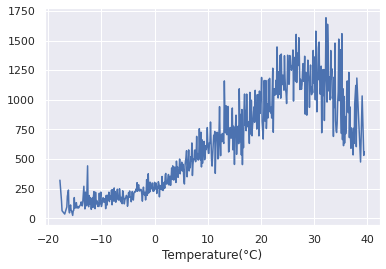

In [700]:
bike_df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

Conclusion 
1. From the bove grapg we can conclude that people rented more bikes with the avrage 
   tempreture lies in between 25 to 35 celcious.
2. When the avrage tempreture lies in between -20 to 0 celcious people are not prefer to 
   rent bikes.
3. When the tempreture is normal from 20 celsious to 35 celcious we can see more bikes 
   have been rented when the tempreture gradualy increses from 20 to 35 celcious.

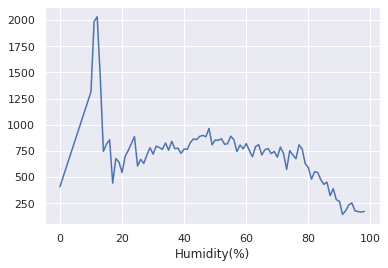

In [701]:
bike_df.groupby('Humidity(%)').mean()['Rented Bike Count'].plot()

conclusion
1. From the above graph we can say that when the avrage humidity percentage is lies in
   between 5 to 10 we have high rented bike counts.
2. After that number of rented bikes counts becomes normal from the avrage humidity
   percentage lies in between 20 to 70.
3. We can see decrese in rented bikes counts when the avrage humidity percentage increses 
   after 70 .

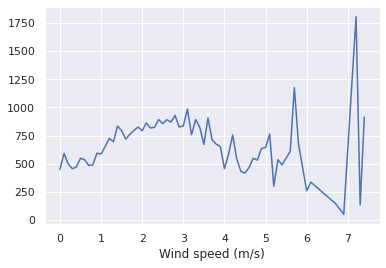

In [702]:
bike_df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

Conclusion
1. when the avrage wind speed is between 0 to 5 then rented bikes counts are normal
   but we can see the increase  in rented bike counts when the wind speed lies in between 
   5 to 6 and see the high pick when it reaches after 7 .

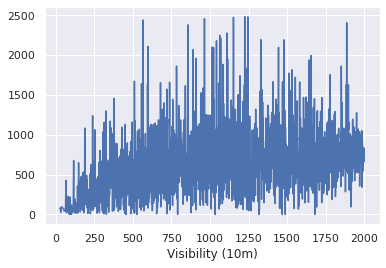

In [703]:
bike_df.groupby('Visibility (10m)').mean()['Rented Bike Count'].plot()

conclusion
1. There are some picks in the above graph which tells the rented bike counts
   with respect to visibility.

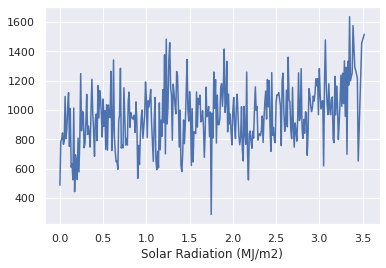

In [704]:
bike_df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

conclusion
1. From the above graph we can observe that solar rediation does not affect much 
   on the rented bike counts

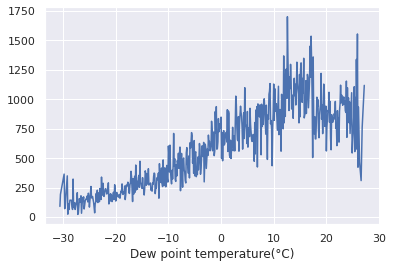

In [705]:
bike_df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

:conclusion
1. From the above graph we can see that when deu point tempreture becomes 25 celcius 
   we have more rented bike count.

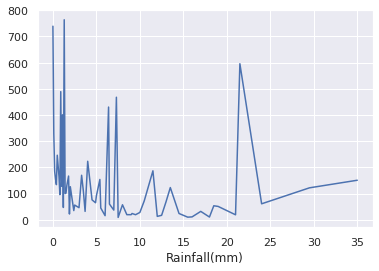

In [706]:
bike_df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

Conclusion
  1. From the above graph when the avrage rainfall is from 0 to 2.5 we have seen that more 
     bikes are rented.
  2. Also when it becomes 20 to 25 we can se the huge pick in the rented bike counts.

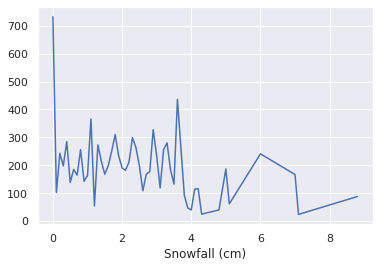

In [707]:
bike_df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

conclusion
1. when we have more than avrage snowfll of 4 cm number of rented bikes
  gettting lower and lower.

#  Distribution of target variables

Transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


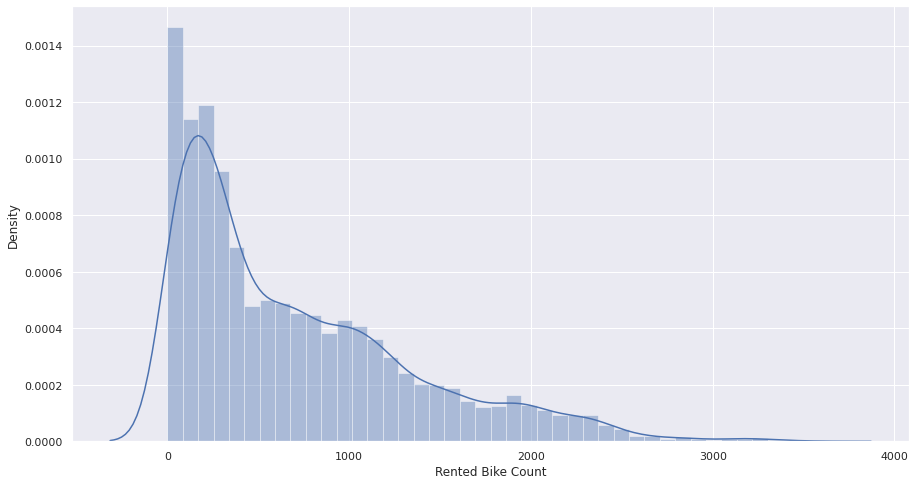

In [708]:
# Dependent variable 'Rented bike count'
plt.figure(figsize=(15,8))
sns.distplot(bike_df['Rented Bike Count'], color='b')

Conclusion = We seen that Rented Bike Count has moderate right skewness.Assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

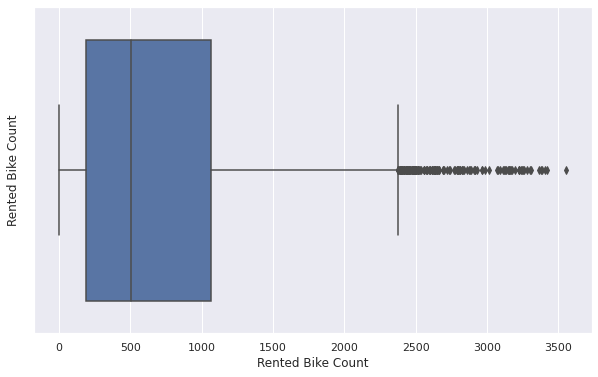

In [709]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=bike_df['Rented Bike Count'])
plt.show()

Conclusion = From Above we seen that we have detect outliers in Rented Bike Count column

# sqrt transformation of target features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


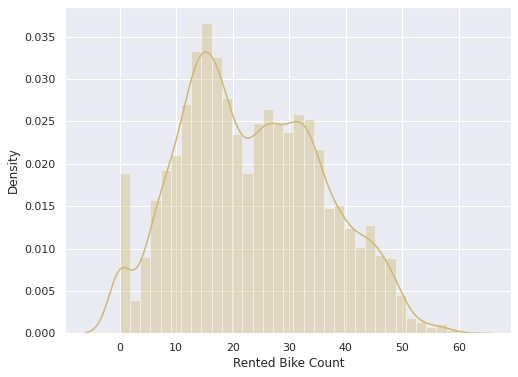

In [710]:
plt.figure(figsize=(8,6))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']),color="y") # normalise 'Rented Bike Count' column data

Conclusion = Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

In [711]:
# Numerical feature of our dataset
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year'],
      dtype='object')

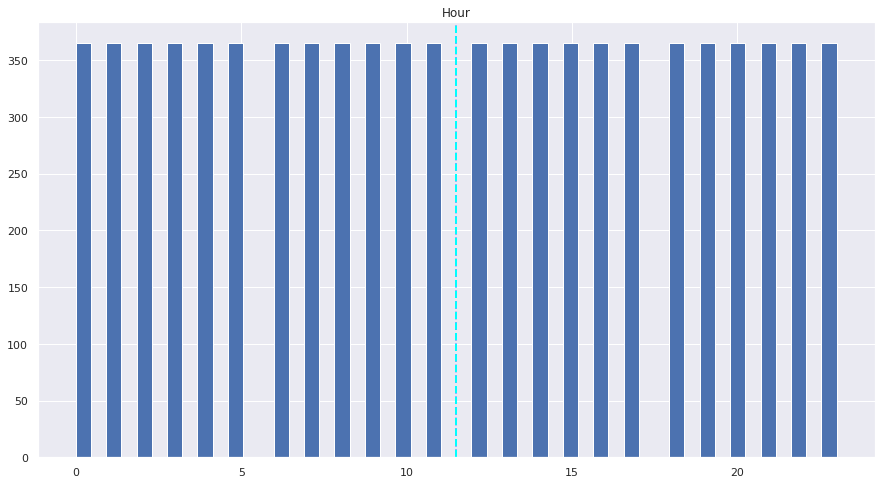

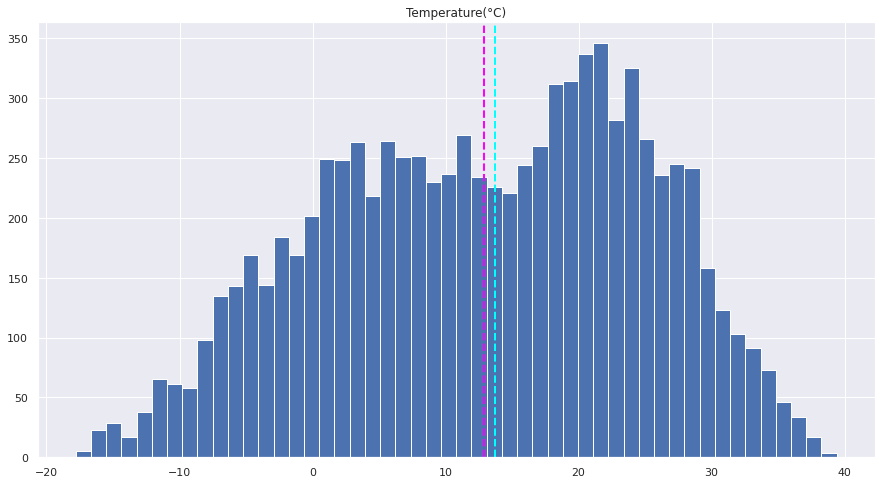

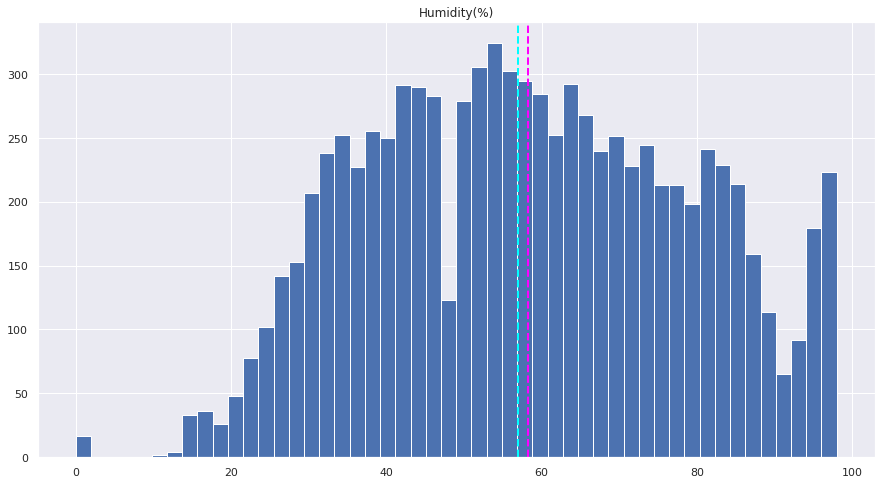

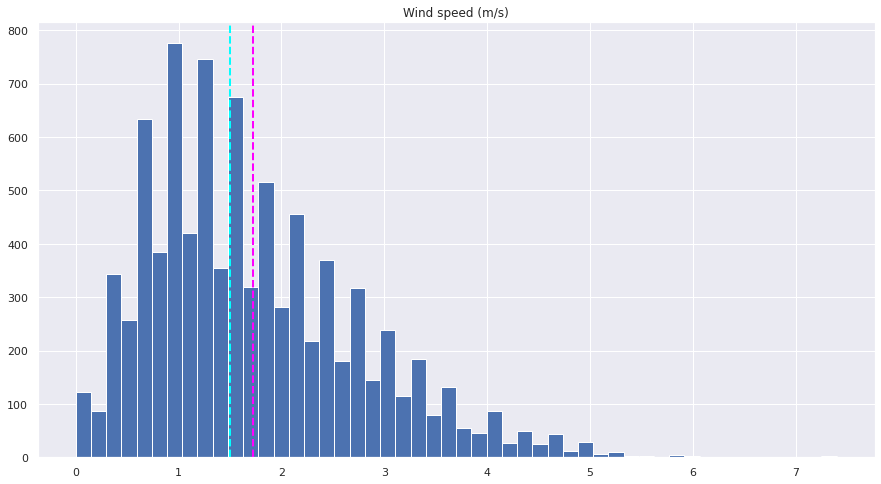

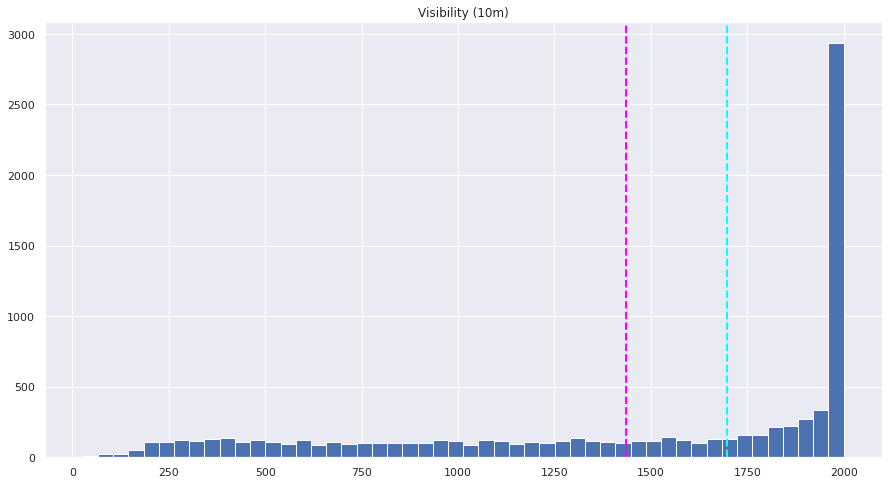

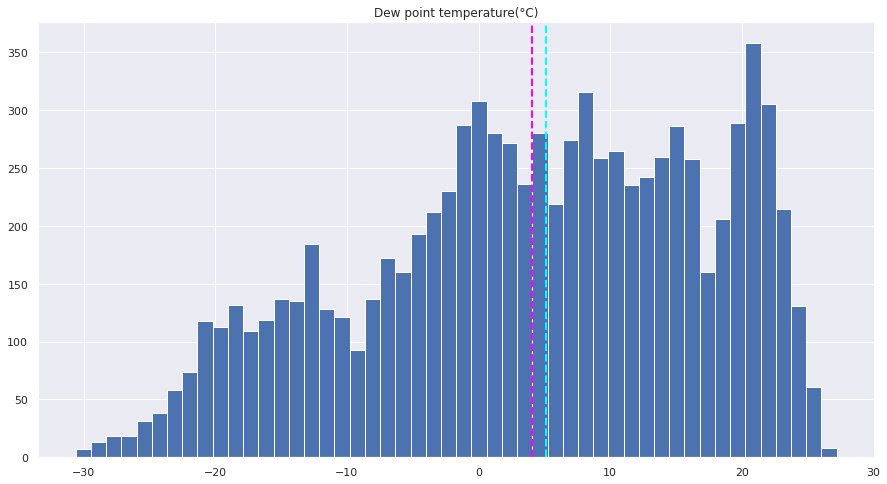

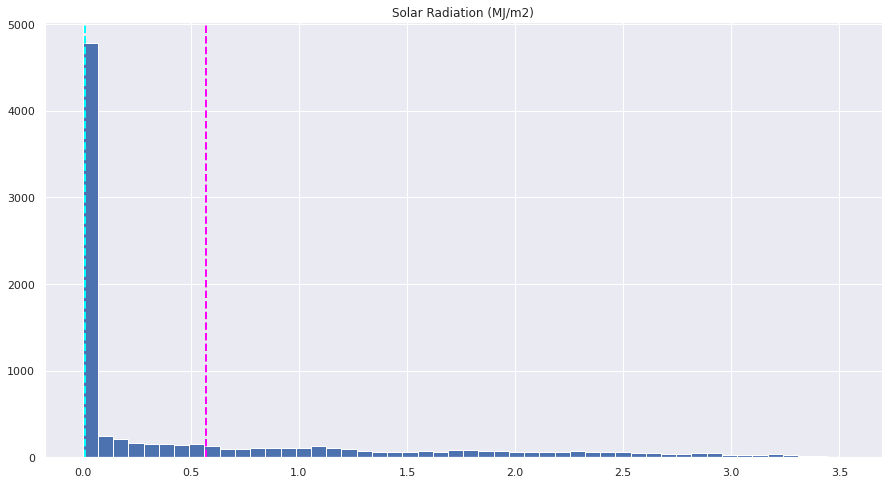

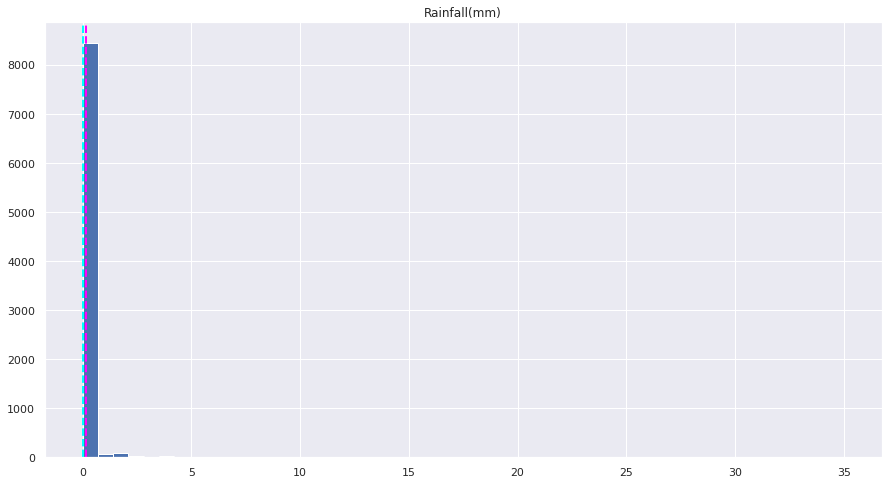

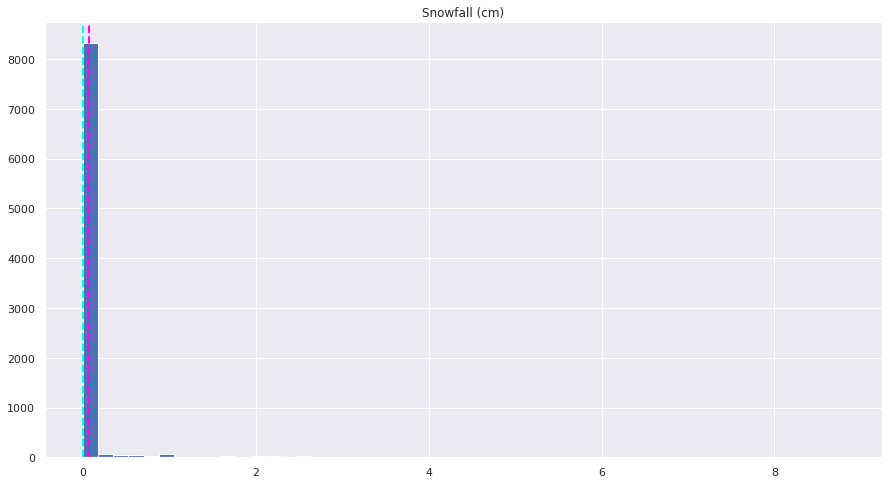

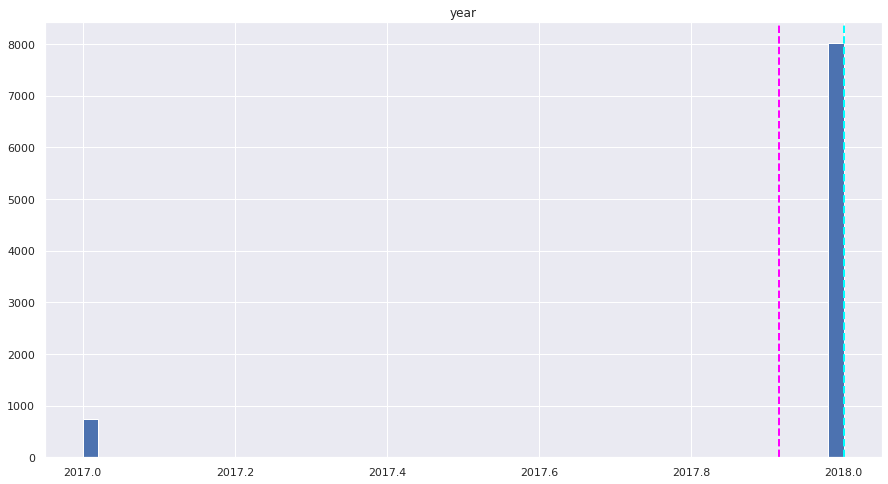

In [712]:
# plot a barplot for each numerical feature count
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(15,8))
  ax = fig.gca()
  feature = bike_df[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color= 'cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

# Regression plot
Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. This kinds of plots in seaborn and shows the ways that can be adapted to change the size, aspect, ratio etc. of such plots

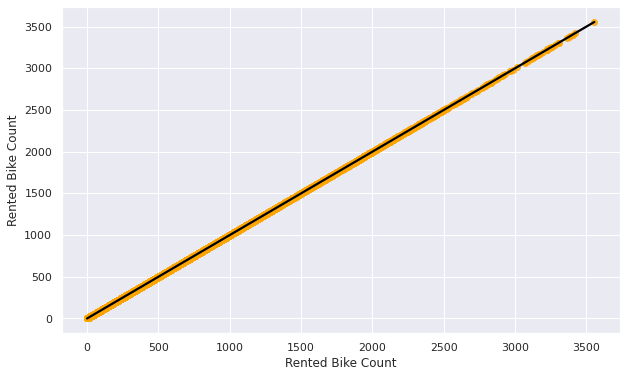

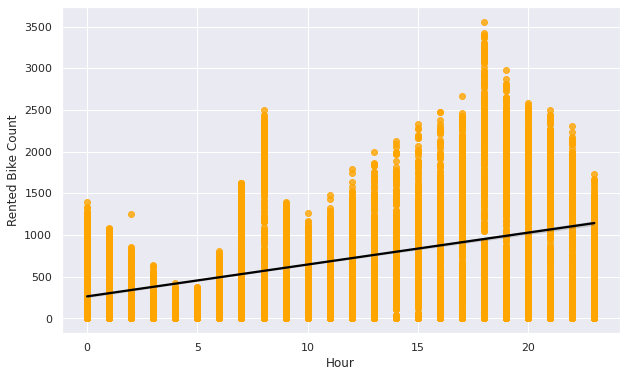

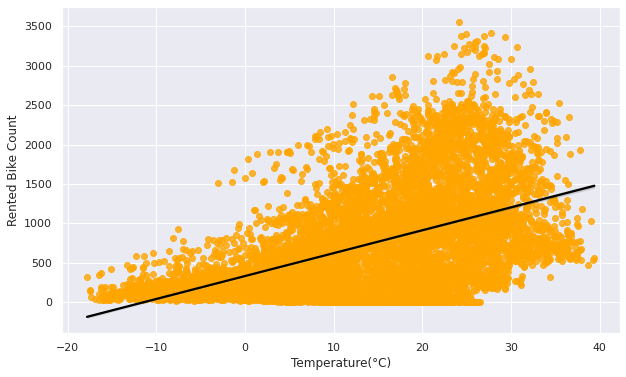

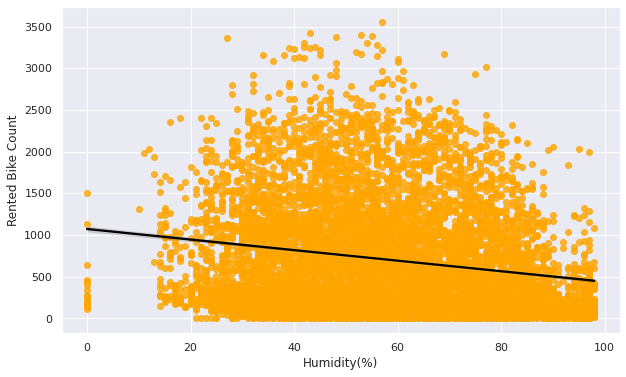

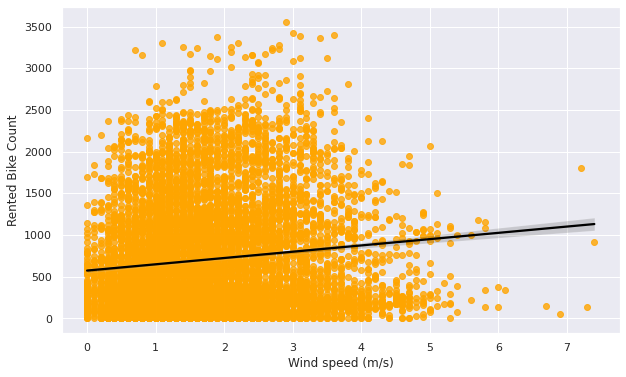

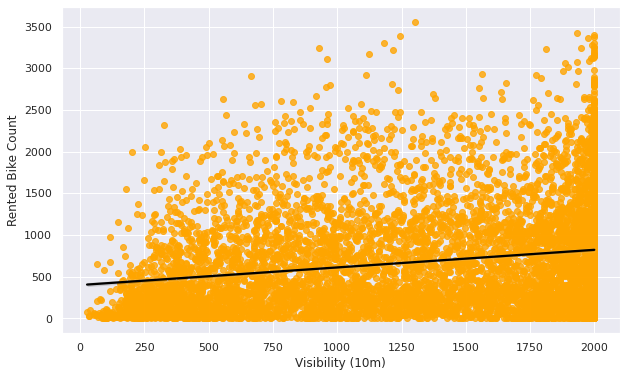

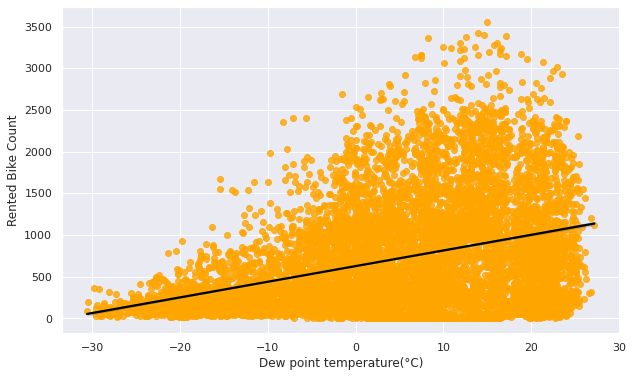

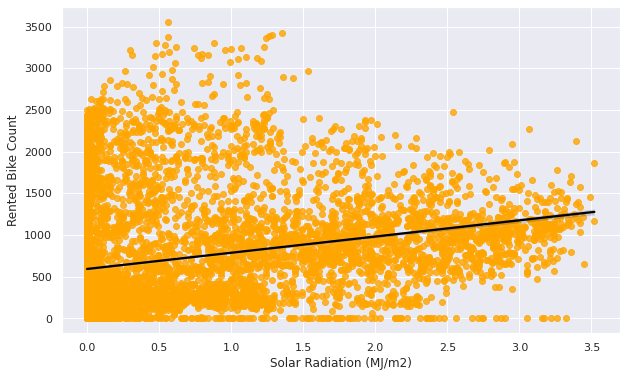

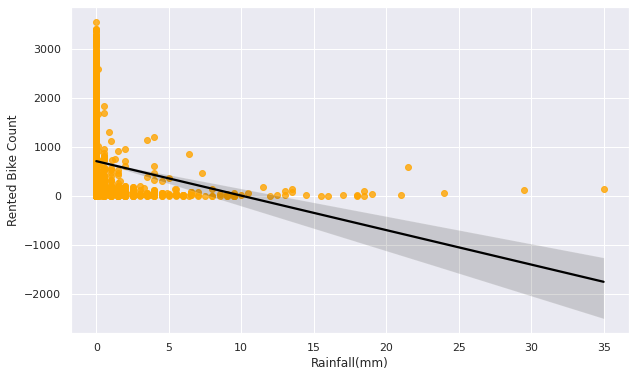

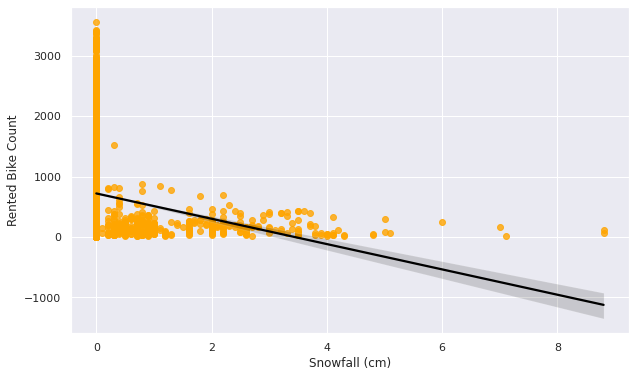

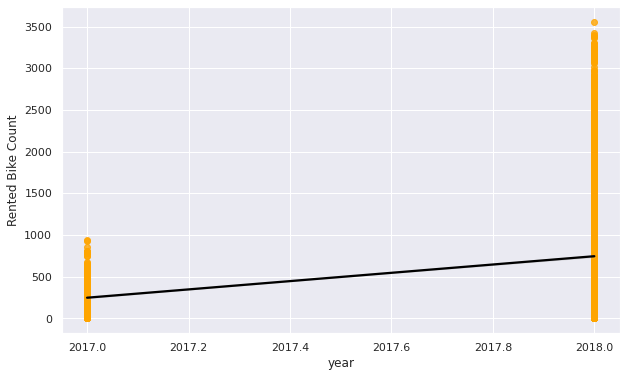

In [713]:
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

Conclusion = Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

# Heatmap

we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation 

---

matrix representing correlation between different variable.

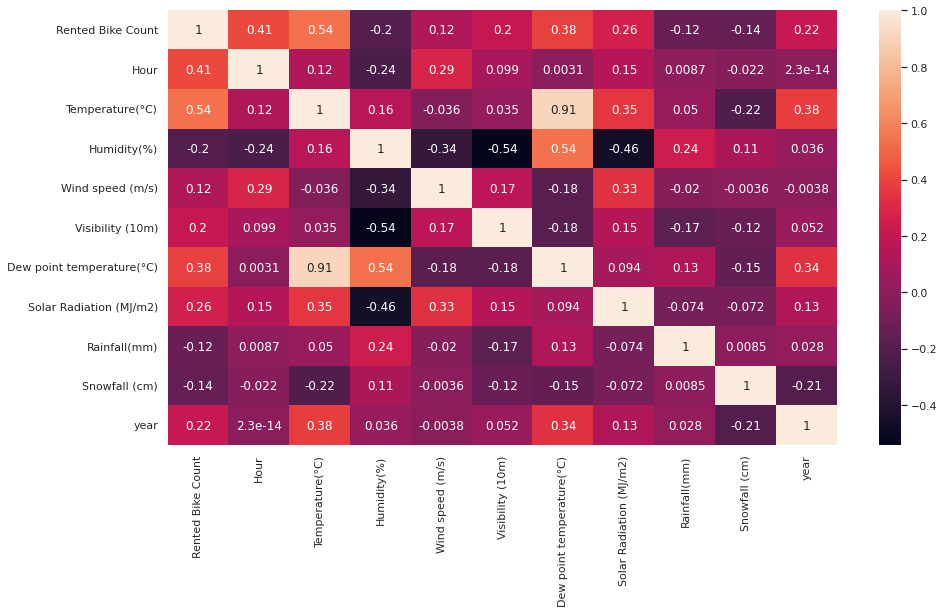

In [714]:
# Correlation of heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bike_df.corr(), cmap='rocket', annot=True)

Conclusion = 1. We seen that form heatmap that on target variable line the most positively correlated variables to the rent are: Tempreture, The dew point tempreture, The solar radiation
           
2. From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.

In [715]:
# Drop the dew point tempreture column
bike_df = bike_df.drop(['Dew point temperature(°C)'],axis=1)

## One Hot Encoding

In [716]:
# Creating dummy variable for categorical variables- season, month, weekofdays, year, holidays, functional day
seasons = pd.get_dummies(bike_df['Seasons'])
working_day = pd.get_dummies(bike_df['Holiday'], prefix='Holiday')
F_day = pd.get_dummies(bike_df['Functioning Day'], prefix = 'F_day')
month = pd.get_dummies(bike_df['month'])
week_day = pd.get_dummies(bike_df['Dayofweek'])
year = pd.get_dummies(bike_df['year'])

In [717]:
bike_df = pd.concat([bike_df,seasons,working_day,F_day,month,week_day,year],axis=1)

In [788]:
# checking the data dummy variable is created or not

bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,...,Sep,Fri,Mon,Sat,Sun,Thur,Tues,Wed,2017,2018
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0


In [718]:
bike_df.drop(['Seasons','Holiday','Functioning Day','Dayofweek','month','year'],axis=1,inplace=True)

In [719]:
bike_df.drop(['Date'],axis=1,inplace=True) # droping date because we already extract the date from the data

In [720]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [721]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count',]]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Rented Bike Count,2.461814
1,Hour,1.452215
2,Temperature(°C),10.763561
3,Humidity(%),3.171869
4,Wind speed (m/s),1.323163
5,Visibility (10m),2.315943
6,Solar Radiation (MJ/m2),2.025276
7,Rainfall(mm),1.103173
8,Snowfall (cm),1.139781
9,Autumn,inf


# Lets Import the models

In [722]:
#importing important packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model Training 

In [723]:
# splitting dependent and independent features
X = bike_df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(bike_df['Rented Bike Count'])

In [724]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=80)
print(X_train.shape)
print(X_test.shape)

(6132, 37)
(2628, 37)


In [725]:
# Scaling data by using minmaxscalar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Linear Regressor

In [726]:
#fitting linear regresor 
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression().fit(X_train, y_train)

In [727]:
# Making predictions on train and test data
y_pred_train_lin = lin_reg.predict(X_train)
y_pred_test_lin =lin_reg.predict(X_test)

In [728]:
#check the score
lin_reg.score(X_train, y_train)

0.6669869851784311

In [729]:
#check the coefficeint
lin_reg.coef_

array([ 1.09585944e+01,  3.24152671e+01, -1.26327985e+01,  3.64090032e+00,
        3.15514040e+00, -4.56027079e+00, -4.51730427e+01,  4.50187596e+00,
       -3.38080498e+14,  3.83804310e+14, -1.66561485e+14, -1.41391318e+14,
        1.50400159e+13,  1.50400159e+13, -1.59392774e+13, -1.59392774e+13,
       -5.10941385e+14,  3.94244107e+13, -1.73856358e+14,  1.42542433e+13,
        1.42542433e+13,  3.94244107e+13,  3.94244107e+13, -5.10941385e+14,
       -5.10941385e+14,  2.10943423e+14,  2.10943423e+14,  2.10943423e+14,
       -2.39916325e+13, -2.39916325e+13, -2.39916325e+13, -2.39916325e+13,
       -2.39916325e+13, -2.39916325e+13, -2.39916325e+13,  3.79693348e+13,
       -1.50141267e+14])

# Evaluation Matrics

# Train Accuracy of model

In [730]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (
y_pred_train_lin))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, 
y_pred_train_lin)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_train_ln= r2_score(y_train, 
y_pred_train_lin)
print("R2 :",r2_train_ln)
Adjusted_R2_lr = (1-(1-r2_score(y_train, 
y_pred_train_lin))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, 
y_pred_train_lin))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.19126735573527
RMSE : 7.224352383136863
MAE : 5.585665241559689
R2 : 0.6669869851784311
Adjusted R2 : 0.6622296563952659


# Test Accuracy of model

In [731]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test_lin))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test_lin)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_ln= r2_score(y_test,  y_pred_test_lin)
print("R2 :",r2_ln)
Adjusted_R2_lr = (1-(1-r2_score(y_test,  y_pred_test_lin))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test,  y_pred_test_lin))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 51.63085096806353
RMSE : 7.185461082495926
MAE : 5.451877045878587
R2 : 0.657937923163272
Adjusted R2 : 0.6530513220656045


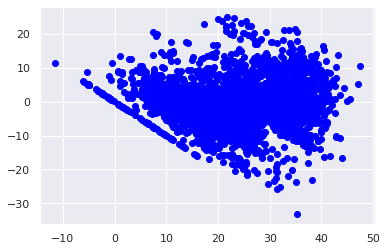

In [732]:
# Heteroscadacity
### Heteroscadacity
plt.scatter((y_pred_test_lin),(y_test)-(y_pred_test_lin),color='blue')


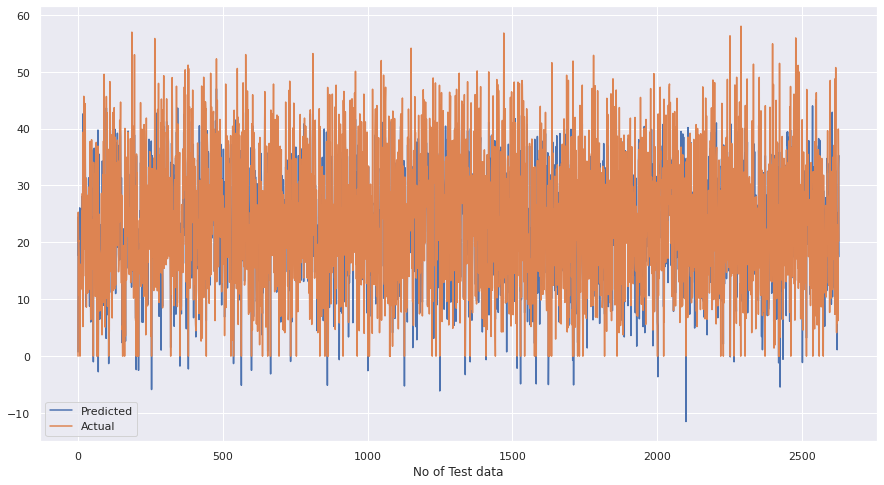

In [733]:
# Plotting result from above model
plt.figure(figsize=(15,8))
plt.plot((y_pred_test_lin))
plt.plot(np.array((y_test)))
plt.legend(['Predicted', 'Actual'])
plt.xlabel('No of Test data')
plt.show()

In [734]:
# storing the Train set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [735]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

## Lasso Regression

In [736]:
#importing imp pakages
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 5, 8]}
lasso_reg = GridSearchCV(lasso, parameters, cv=5)
lasso_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 8]})

In [737]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.01}


In [738]:
# Fit the Lasso model
lasso = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 8]})

In [739]:
# Making predictions on train and test data

y_pred_train_lasso = lasso_reg.predict(X_train)
y_pred_test_lasso =lasso_reg.predict(X_test)

## Train accuracy of model

In [740]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (
y_pred_train_lasso))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, 
y_pred_train_lasso)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_train_lasso= r2_score(y_train, 
y_pred_train_lasso)
print("R2 :",r2_train_lasso)
Adjusted_R2_lr = (1-(1-r2_score(y_train, 
y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, 
y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 49.13078267249149
RMSE : 7.00933539449294
MAE : 5.398256122706897
R2 : 0.6865147966844348
Adjusted R2 : 0.6820364366370697


## Test accuracy of model

In [741]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lasso= r2_score(y_test,  y_pred_test_lasso)
print("R2 :",r2_lasso)
Adjusted_R2_lr = (1-(1-r2_score(y_test,  y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test,  y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 49.216837472871006
RMSE : 7.015471293710139
MAE : 5.316215850972862
R2 : 0.6739311220781652
Adjusted R2 : 0.6692729952507104


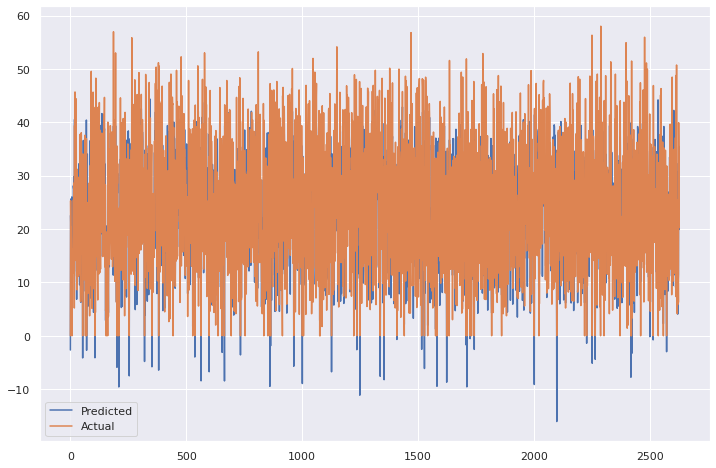

In [742]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

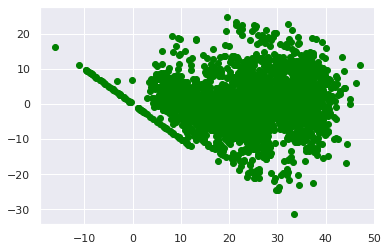

In [743]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso), color='green')

# Ridge Regression

In [744]:
#importing important pakages
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.01,0.001,5,10,18,80,400]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.01, 0.001, 5, 10, 18, 80, 400]})

In [745]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
#check the score
ridge_regressor.score(X_train, y_train)

The best fit alpha value is found out to be : {'alpha': 0.01}


0.6875688240013911

In [746]:
# Fit the Lasso model
ridge_regressor = Ridge(alpha=0.01)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.01)

In [747]:
# Making predictions on train and test data

y_pred_train_ridge = ridge_regressor.predict(X_train)
y_pred_test_ridge = ridge_regressor.predict(X_test)

## Training accuracy of **model**

In [748]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (
y_pred_train_ridge))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, 
y_pred_train_ridge)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_train_ridge= r2_score(y_train, 
y_pred_train_ridge)
print("R2 :",r2_train_ridge)
Adjusted_R2_lr = (1-(1-r2_score(y_train, 
y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, 
y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 48.96559086601212
RMSE : 6.997541773080895
MAE : 5.38036528258554
R2 : 0.6875688240013911
Adjusted R2 : 0.6831055214871253


## Test accuracy of model

In [749]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_ridge= r2_score(y_test,  y_pred_test_ridge)
print("R2 :",r2_ridge)
Adjusted_R2_r2_ridge = (1-(1-r2_score(y_test,  y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test,  y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 49.13746708335218
RMSE : 7.009812200291258
MAE : 5.308803413677983
R2 : 0.6744569627290378
Adjusted R2 : 0.6698063479108811


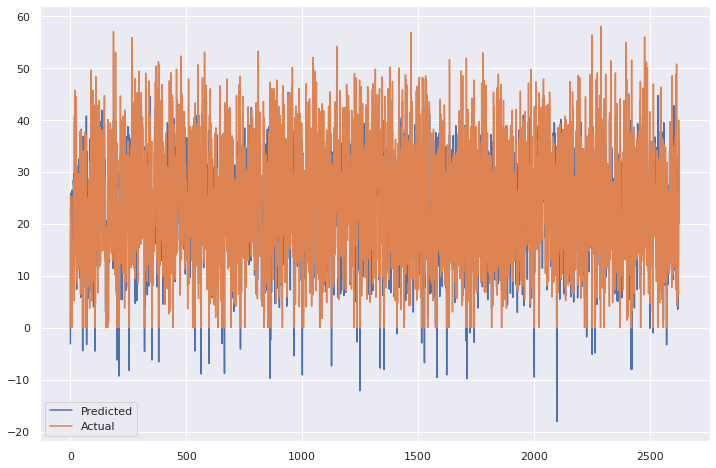

In [750]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_ridge))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

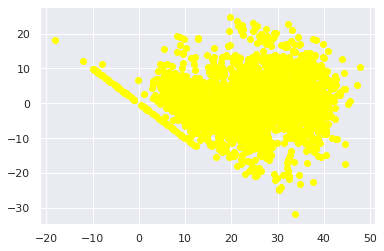

In [751]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test-y_pred_test_ridge), color='yellow')

# Decision Tree - Regression model

In [752]:
# training model

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [753]:
y_pred_train_dt =dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Training accuracy of model

In [754]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train_dt))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train_dt)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_train_dt= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2_train_dt)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 0.0
RMSE : 0.0
MAE : 0.0
R2 : 1.0
Adjusted R2 : 1.0


## Test Accuracy of model

In [755]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), ( y_pred_test_dt))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test_dt)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_dt= r2_score(y_test,  y_pred_test_dt)
print("R2 :",r2_dt)
Adjusted_R2_lr = (1-(1-r2_score(y_test,  y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test,  y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 18.646347086154933
RMSE : 4.318141624142837
MAE : 2.6738531811617143
R2 : 0.8764651736293502
Adjusted R2 : 0.8747003903954838


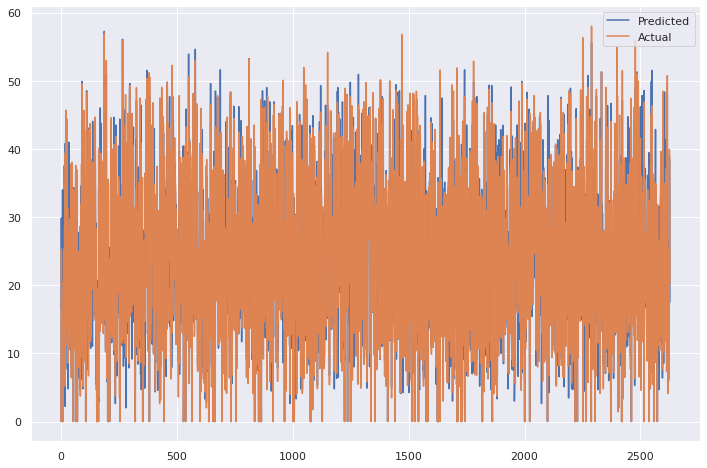

In [756]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

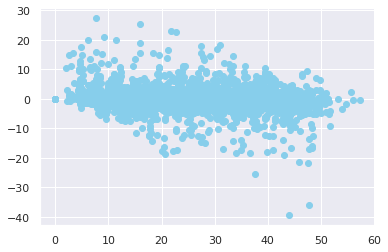

In [757]:
### Heteroscadacity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt), color='skyblue')

# Gradient boosting Regressor

In [758]:
xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

GradientBoostingRegressor()

In [759]:
# Making predictions on train and test data

y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

# Training accuracy of model

In [760]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train_xgb))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_train_xgb= r2_score(y_train, y_pred_train_xgb)
print("R2 :",r2_train_xgb)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 15.167444706817989
RMSE : 3.894540371702159
MAE : 2.810742713214145
R2 : 0.9032221912809738
Adjusted R2 : 0.9018396511564163


# Test accuracy of model

In [761]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), ( y_pred_test_xgb))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_xgb= r2_score(y_test,  y_pred_test_xgb)
print("R2 :",r2_xgb)
Adjusted_R2_lr = (1-(1-r2_score(y_test,  y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test,  y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 17.632189446382075
RMSE : 4.199070069239387
MAE : 2.990682938059458
R2 : 0.8831841190272309
Adjusted R2 : 0.88151532072762


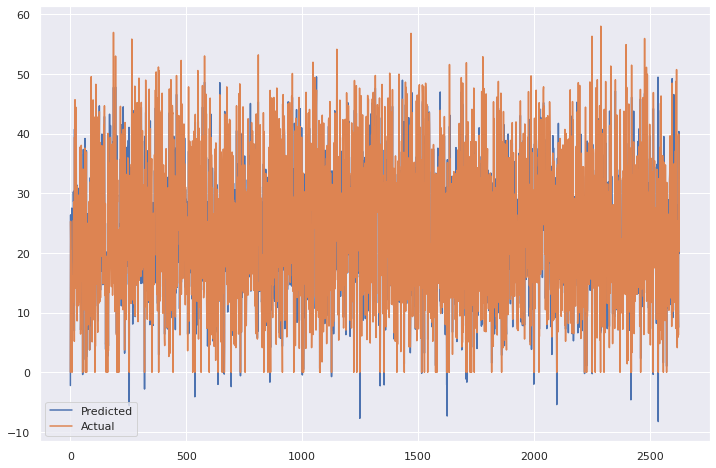

In [762]:
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_xgb))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

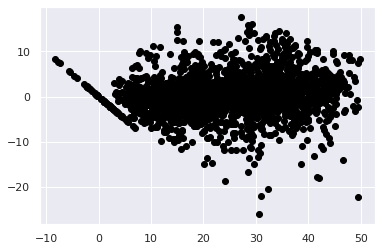

In [763]:
### Heteroscadacity
plt.scatter((y_pred_test_xgb),(y_test)-(y_pred_test_xgb), color='black')

## Hyperparameter tuning of xg boost regressor

In [764]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [765]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost


In [766]:
xgb_hyp=XGBRegressor(random_state=1)

In [767]:
random_search=RandomizedSearchCV(xgb_hyp,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3,random_state=1)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[11:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(random_state=1), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=1, verbose=3)

In [768]:
random_search.best_estimator_

XGBRegressor(colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15,
             min_child_weight=7, random_state=1)

In [769]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.3,
 'max_depth': 15,
 'min_child_weight': 7}

In [770]:
xgb_hyp =XGBRegressor(colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15,
             min_child_weight=7, random_state=1)
xgb_hyp.fit(X_train,y_train)

[11:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15,
             min_child_weight=7, random_state=1)

In [771]:
# Making predictions on train and test data

y_pred_train_xgb_hyp = xgb_hyp.predict(X_train)
y_pred_test_xgb_hyp = xgb_hyp.predict(X_test)

In [772]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_hyp,X_train,y_train,cv=10)

[11:32:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [773]:
score

array([0.94212518, 0.94200028, 0.94259889, 0.9139346 , 0.94531335,
       0.94424436, 0.93675153, 0.94177901, 0.92388554, 0.9441325 ])

In [774]:
score.mean()

0.9376765246011738

In [775]:
xgb_hyp_r2=r2_score(y_pred_test_xgb_hyp,y_test)

In [776]:
xgb_hyp_r2

0.926705903175543

## Train accuracy

In [777]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train_xgb_hyp))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train_xgb_hyp)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_train_xgb_hyp= r2_score(y_train, y_pred_train_xgb_hyp)
print("R2 :",r2_train_xgb_hyp)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train_xgb_hyp))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xgb_hyp))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 0.08434638684563493
RMSE : 0.2904244942246348
MAE : 0.2135055042822931
R2 : 0.9994618171583893
Adjusted R2 : 0.9994541288320806


## Test Accuracy

In [778]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), ( y_pred_test_xgb_hyp))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test_xgb_hyp)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_xgb_hyp= r2_score(y_test,  y_pred_test_xgb_hyp)
print("R2 :",r2_xgb_hyp)
Adjusted_R2_lr = (1-(1-r2_score(y_test,  y_pred_test_xgb_hyp))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test,  y_pred_test_xgb_hyp))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 10.183696207992677
RMSE : 3.1911904061012524
MAE : 2.0981942323331286
R2 : 0.9325314960054601
Adjusted R2 : 0.9315676602341096


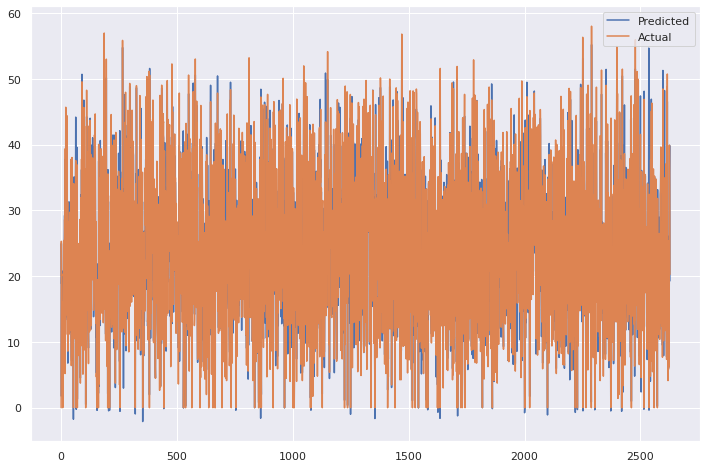

In [779]:
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_xgb_hyp))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

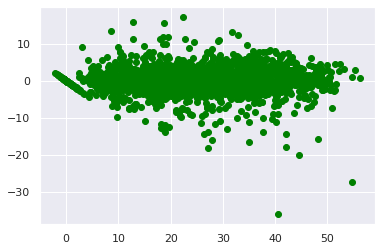

In [780]:
### Heteroscadacity
plt.scatter((y_pred_test_xgb_hyp),(y_test)-(y_pred_test_xgb_hyp), color='green')

In [781]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Decision Tree Regressor','Gradient Bossting regressor','Hyperparameter tuning of xg boost']

In [782]:
#creating list of all r2 on training dataset
result_list_train=[r2_train_ln,r2_train_lasso,r2_train_ridge,r2_train_dt,r2_train_xgb,r2_train_xgb_hyp]

In [783]:
#creating list of all r2 of testing dataset
result_list_test = [r2_ln,r2_lasso,r2_ridge,r2_dt,r2_xgb,r2_xgb_hyp]

In [784]:
# creating an empty dataframe

results_df = pd.DataFrame()

In [785]:
# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['r2_train'] = result_list_train
results_df['r2_test'] = result_list_test



In [786]:
# dataframe containing results from all the above models used

results_df

,model name,r2_train,r2_test
0,Linear regression,0.666987,0.657938
1,Lasso regression,0.686515,0.673931
2,Ridge regression,0.687569,0.674457
3,Decision Tree Regressor,1.000000,0.876465
4,Gradient Bossting regressor,0.903222,0.883184
5,Hyperparameter tuning of xg boost,0.999462,0.932531


## Conclusion

1. Demand for bikes got higher when the temperature and hour values were more.

2. Demand was high for low values of Humidity and solar radiation.

3. Demand was high during springs and summer and autumn and very low during winters.

4. Maximum bikes were reneted in the year 2018

5. Count of rented bikes is high during no holiday and functioning day especially during office time.

# Model Fitting Conclusion

1. XG Boost regressor performs best in that dataset it gives the accuracy of 88 %  also when we hypertune that model the accuracy incresses by aroud 5 % finally it giver the accuracy of 93 % on the testing dataset.

2. The most important features who had a major impact on the model predictions were; hour, temperature, Humidity, solar-radiation, and Winter.


**The model performed well in this case but as the data is time dependent, values of temperature, wind-speed, solar radiation etc. will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time**